In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#!pip install wordcloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Loading Data 
!pip install datasets
import datasets 
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')   
df = dataset['train'].to_pandas()

Using custom data configuration ucberkeley-dlab--measuring-hate-speech-7a847a2ec289eb57
Reusing dataset parquet (/home/hhklab/.cache/huggingface/datasets/ucberkeley-dlab___parquet/ucberkeley-dlab--measuring-hate-speech-7a847a2ec289eb57/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.head(5)

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [4]:
df.describe()

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135556 entries, 0 to 135555
Columns: 131 entries, comment_id to annotator_sexuality_other
dtypes: bool(103), float64(19), int32(2), int8(1), object(6)
memory usage: 40.3+ MB


In [6]:
len(df)

135556

In [7]:
data=df['text']

In [8]:
data

0         Yes indeed. She sort of reminds me of the elde...
1         The trans women reading this tweet right now i...
2         Question: These 4 broads who criticize America...
3         It is about time for all illegals to go back t...
4         For starters bend over the one in pink and kic...
                                ...                        
135551    عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي  نص...
135552    Millions of #Yemen-is participated in mass ral...
135553    @AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...
135554    Millions of #Yemen-is participated in mass ral...
135555    لا تتشمت الرجال مسكين يعاني كس امه 😂. يقول يال...
Name: text, Length: 135556, dtype: object

In [9]:
# Keeping English texts and removing other language texts
english=df[df['text'].apply(lambda x: x.isascii())]

In [10]:
english.count()

comment_id                      124542
annotator_id                    124542
platform                        124542
sentiment                       124542
respect                         124542
                                 ...  
annotator_religion_other        124542
annotator_sexuality_bisexual    124542
annotator_sexuality_gay         124542
annotator_sexuality_straight    124542
annotator_sexuality_other       124542
Length: 131, dtype: int64

In [11]:
len(english)

124542

In [12]:
english.describe()

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,...,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,124542.000000,124448.000000
mean,23214.809101,5564.637680,1.247057,2.991352,2.859758,2.595157,2.305174,2.719155,1.869410,1.085818,...,0.758041,-0.491276,1.035604,1.006382,-0.018317,0.295055,1.007219,1.012473,0.034636,37.890091
std,12449.615850,3228.258225,1.028345,1.214270,1.299191,1.384020,1.368373,0.901585,1.405026,1.366519,...,0.936622,2.380495,0.495027,0.789649,0.487065,0.234011,0.269800,0.676320,0.610589,11.640100
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,17393.000000,2723.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.260000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.318932,29.000000
50%,20047.000000,5597.500000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,...,0.000000,-0.240000,0.950000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.140811,35.000000
75%,31369.000000,8361.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.470000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.457582,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [13]:
# Data cleaning
#1) keeping only useful columns
tweets=english[['comment_id','text','sentiment','insult','humiliate','violence','hatespeech','respect','humiliate','hate_speech_score','target_gender_men','target_gender_women','target_gender_other']]

In [14]:
tweets

,comment_id,text,sentiment,insult,humiliate,violence,hatespeech,respect,humiliate,hate_speech_score,target_gender_men,target_gender_women,target_gender_other
0,47777,Yes indeed. She sort of reminds me of the elde...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.90,False,False,False
1,39773,The trans women reading this tweet right now i...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.52,False,False,False
2,47101,Question: These 4 broads who criticize America...,4.0,4.0,4.0,0.0,2.0,4.0,4.0,0.36,False,False,False
3,43625,It is about time for all illegals to go back t...,2.0,2.0,1.0,0.0,0.0,3.0,1.0,0.26,False,False,False
4,12538,For starters bend over the one in pink and kic...,4.0,4.0,4.0,4.0,2.0,4.0,4.0,1.54,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135536,20059,happy pride month i'm gay URL,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-4.30,False,False,False
135537,20060,I love that you enjoy being trans.,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-4.44,False,False,False
135538,20067,"Please help support nonbinary pride, add a #Tw...",2.0,2.0,2.0,1.0,0.0,2.0,2.0,-4.86,False,False,False
135539,20069,Trans rights are human rights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.40,False,False,False


In [15]:
#Removing stopwords 
print(stopwords.words('english'))
stop=stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
tweets['new_text'] = tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tweets.head()

,comment_id,text,sentiment,insult,humiliate,violence,hatespeech,respect,humiliate,hate_speech_score,target_gender_men,target_gender_women,target_gender_other,new_text
0,47777,Yes indeed. She sort of reminds me of the elde...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.90,False,False,False,Yes indeed. She sort reminds elder lady played...
1,39773,The trans women reading this tweet right now i...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.52,False,False,False,The trans women reading tweet right beautiful
2,47101,Question: These 4 broads who criticize America...,4.0,4.0,4.0,0.0,2.0,4.0,4.0,0.36,False,False,False,"Question: These 4 broads criticize America, co..."
3,43625,It is about time for all illegals to go back t...,2.0,2.0,1.0,0.0,0.0,3.0,1.0,0.26,False,False,False,It time illegals go back country origin keep f...
4,12538,For starters bend over the one in pink and kic...,4.0,4.0,4.0,4.0,2.0,4.0,4.0,1.54,False,True,False,For starters bend one pink kick ass pussy get ...


In [17]:
#Removing punctuations
from string import punctuation
punctuation
tweets['new_text'].str.replace('[{}]'.format(punctuation), '')

0         Yes indeed She sort reminds elder lady played ...
1             The trans women reading tweet right beautiful
2         Question These 4 broads criticize America coun...
3         It time illegals go back country origin keep f...
4         For starters bend one pink kick ass pussy get ...
                                ...                        
135536                         happy pride month im gay URL
135537                                   I love enjoy trans
135538    Please help support nonbinary pride add Twibbo...
135539                            Trans rights human rights
135541                                   I love enjoy trans
Name: new_text, Length: 124542, dtype: object

In [18]:
#Linear Regression
x=tweets[['sentiment','insult','humiliate','violence','hatespeech','respect','humiliate']]
y=tweets['hate_speech_score']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
predictions= lr.predict(x_test)

#error
from sklearn import metrics
print(f'mean absolute error: {metrics.mean_absolute_error(y_test,predictions)}')
print(f"mean squared error : {metrics.mean_squared_error(y_test,predictions)}")
print(f"Root mean squared error : {np.sqrt(metrics.mean_squared_error(y_test,predictions))}")

mean absolute error: 0.7486618432176185
mean squared error : 0.9219212413523202
Root mean squared error : 0.9601672986268176


In [19]:
#Data cleaning
tweets['target_gender_other']=(tweets['target_gender_men']==False) & (tweets['target_gender_women']==False)

In [20]:
#converting true/false to 1/0
tweets[['target_gender_other','target_gender_men','target_gender_women']]=tweets[['target_gender_other','target_gender_men','target_gender_women']].astype(int)


In [21]:
tweets

,comment_id,text,sentiment,insult,humiliate,violence,hatespeech,respect,humiliate,hate_speech_score,target_gender_men,target_gender_women,target_gender_other,new_text
0,47777,Yes indeed. She sort of reminds me of the elde...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.90,0,0,1,Yes indeed. She sort reminds elder lady played...
1,39773,The trans women reading this tweet right now i...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.52,0,0,1,The trans women reading tweet right beautiful
2,47101,Question: These 4 broads who criticize America...,4.0,4.0,4.0,0.0,2.0,4.0,4.0,0.36,0,0,1,"Question: These 4 broads criticize America, co..."
3,43625,It is about time for all illegals to go back t...,2.0,2.0,1.0,0.0,0.0,3.0,1.0,0.26,0,0,1,It time illegals go back country origin keep f...
4,12538,For starters bend over the one in pink and kic...,4.0,4.0,4.0,4.0,2.0,4.0,4.0,1.54,0,1,0,For starters bend one pink kick ass pussy get ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135536,20059,happy pride month i'm gay URL,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-4.30,0,0,1,happy pride month i'm gay URL
135537,20060,I love that you enjoy being trans.,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-4.44,0,0,1,I love enjoy trans.
135538,20067,"Please help support nonbinary pride, add a #Tw...",2.0,2.0,2.0,1.0,0.0,2.0,2.0,-4.86,0,0,1,"Please help support nonbinary pride, add #Twib..."
135539,20069,Trans rights are human rights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.40,0,0,1,Trans rights human rights


<AxesSubplot:title={'center':'Hate speech scores'}, ylabel='Frequency'>

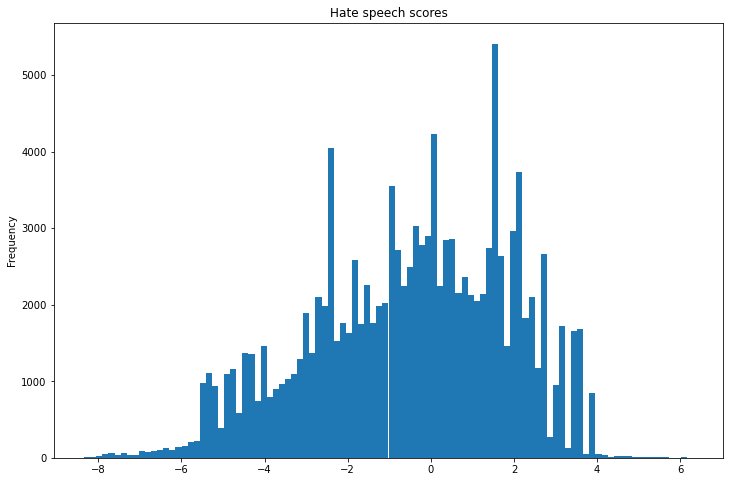

In [22]:
tweets['hate_speech_score'].plot.hist(bins=100, title='Hate speech scores',figsize=(12, 8))

In [23]:
#Average score
print(f"average violence: {tweets['violence'].sum()/len(tweets)}")
print("\n")
print(f"average sentiment: {tweets['sentiment'].sum()/len(tweets)}")
print("\n")
print(f"average hate speech: {tweets['hatespeech'].sum()/len(tweets)}")
print("\n")
print(f"average respect: {tweets['respect'].sum()/len(tweets)}")
print("\n")
print(f"average humiliate: {tweets['humiliate'].sum()/len(tweets)}")


average violence: 1.0858184387596153


average sentiment: 2.9913523148817265


average hate speech: 0.7580414639238169


average respect: 2.859758153875801


average humiliate: humiliate    2.305174
humiliate    2.305174
dtype: float64


<AxesSubplot:title={'center':'gender'}, ylabel='Frequency'>

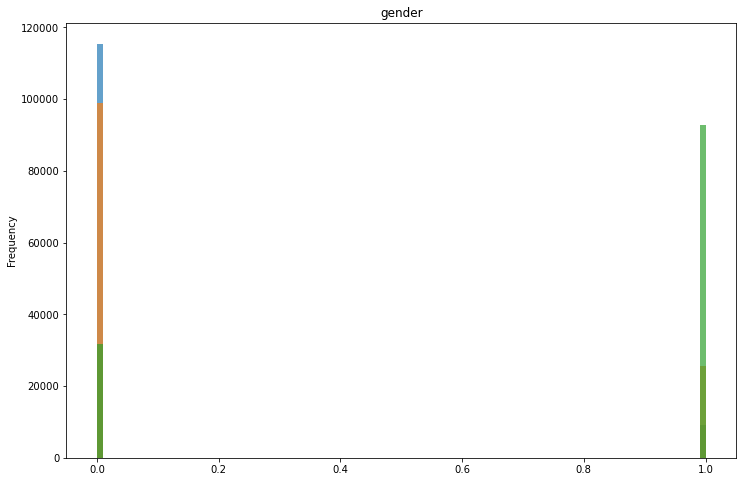

In [24]:
#twwets by gender
tweets['target_gender_men'].plot.hist(bins=100, title='gender',figsize=(12, 8),alpha=0.69)
tweets['target_gender_women'].plot.hist(bins=100, title='gender',figsize=(12, 8),alpha=0.69)
tweets['target_gender_other'].plot.hist(bins=100, title='gender',figsize=(12, 8),alpha=0.69)

In [25]:
#adding gender column
tweets["gender"] = ""
tweets.loc[tweets['target_gender_other']==1,'gender']='Other'
tweets.loc[tweets['target_gender_men']==1,'gender']='Men'
tweets.loc[tweets['target_gender_women']==1,'gender']='Women'

In [26]:
tweets['gender']

0         Other
1         Other
2         Other
3         Other
4         Women
          ...  
135536    Other
135537    Other
135538    Other
135539    Other
135541    Other
Name: gender, Length: 124542, dtype: object

<AxesSubplot:xlabel='gender', ylabel='hate_speech_score'>

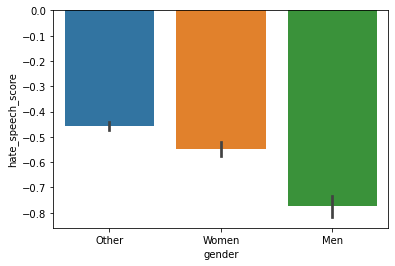

In [27]:
sns.barplot(x='gender',y='hate_speech_score',data=tweets)

<AxesSubplot:xlabel='gender', ylabel='count'>

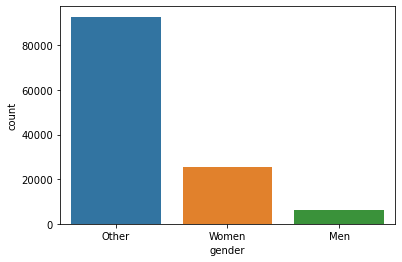

In [28]:
sns.countplot(x='gender',data=tweets)

<Figure size 1440x720 with 0 Axes>

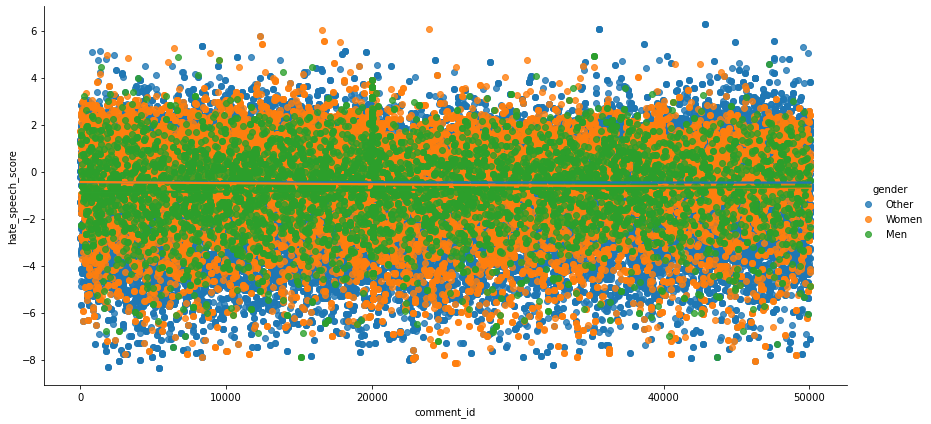

In [29]:
plt.figure(figsize = (20,10))
sns.lmplot('comment_id','hate_speech_score',data=tweets,hue='gender',size=6,aspect=2)

<AxesSubplot:>

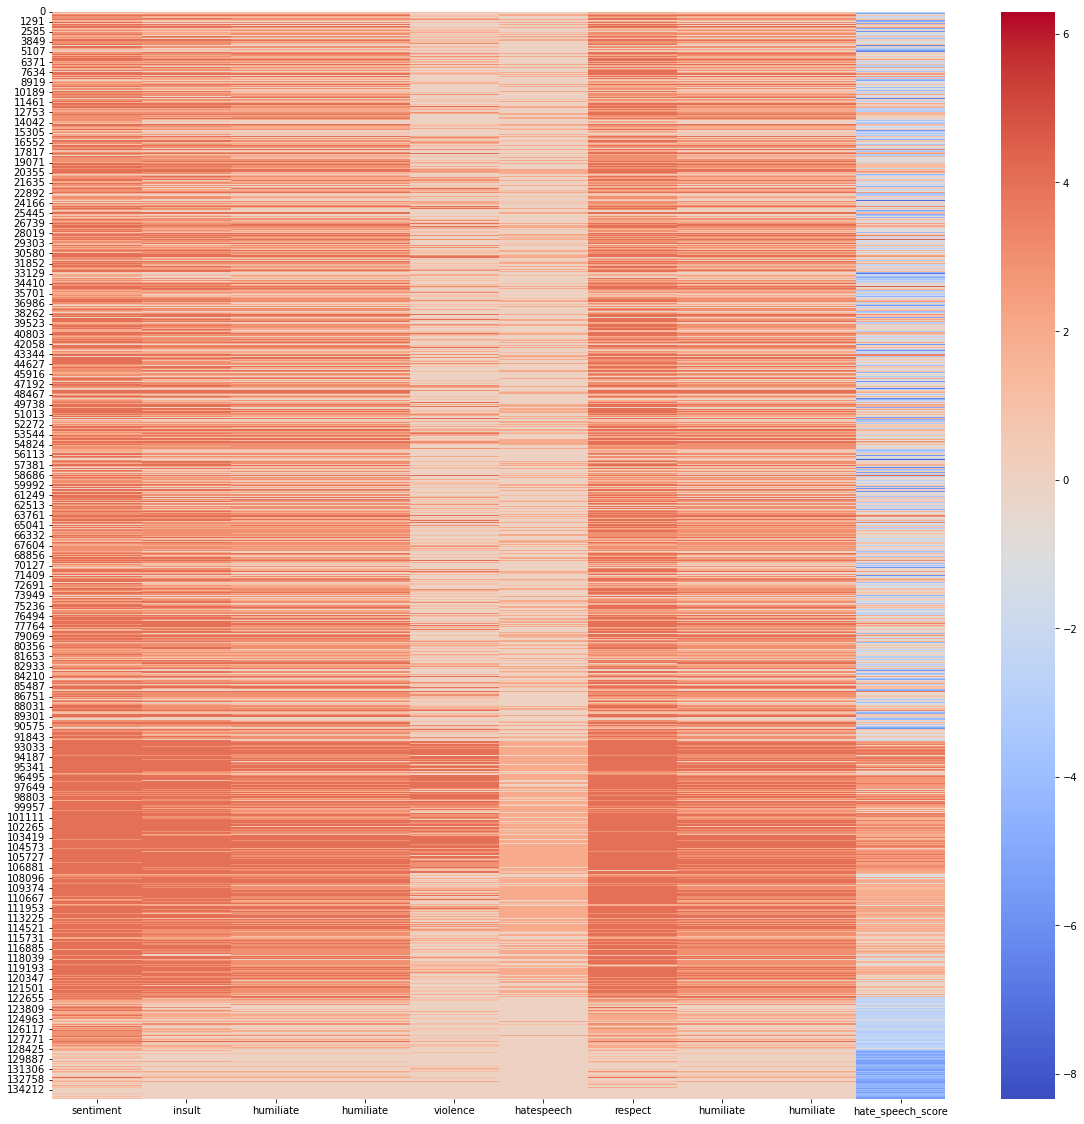

In [30]:
plt.figure(figsize = (20,20))
heat_map=tweets[['sentiment','insult','humiliate','violence','hatespeech','respect','humiliate','hate_speech_score']]
sns.heatmap(heat_map,cmap='coolwarm')